

# Project: Investigate a Dataset - [TMDb Movie Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb).
This data set includes information about important features like: revenue , budget , popularity , genres .....



### Question(s) for Analysis
<li>How film industry grew over years ?
<li>who are the actors with the most appearances ?
<li>What are the Top 10 movies in revenues ? 
<li>What are the Top 10 movies in popularity ?
<li>What is the Most popular genre for each year ?
<li>Are features like budget,popularity and vote average associated with high revenue ? <br>
<li> Which genres achieved the highest revenues ?


In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.0MB/s eta 0:00:01   71% |██████████████████████▉         | 7.5MB 23.6MB/s eta 0:00:01    82% |██████████████████████████▎     | 8.6MB 22.9MB/s eta 0:00:01    92% |█████████████████████████████▊  | 9.7MB 21.2MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.5MB/s eta 0:00:01  8% |██▉                             | 1.2MB 20.4MB/s eta 0:00:01    25% |████████▏                       | 3.4MB 21.5MB/s eta 0:00:01    49% |███████████████▊                | 6.6MB 23.5MB/s eta 0:00:01    57% |██████████████████▌             | 7.7MB 22.5MB/s eta 0:00:01    65% |█████████████████████           | 8.8MB 23.9MB/s eta 0:00:01    73% |███████████████████████▋        | 9.9MB 22.8MB/s eta 0:00:01    82% |██████████████████████████▎     | 11.0MB 23.4MB/s eta 0:00:01    95% |██████████████████████████████▋ | 12.8MB 21.9MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found exist

<a id='wrangling'></a>
## Data Wrangling



first we load the dataset into a pandas dataframe

In [110]:
df=pd.read_csv('Database_TMDb_movie_data//tmdb-movies.csv')

then we look at a few rows to understand the data

In [111]:
print(df.head())

       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      

Now let us look at the size of the data

In [112]:
df.shape

(10866, 21)


### Data Cleaning
> in this step we check for duplicated rows and missing values
 

here we check for duplicates based on both movie title and release year as there might be different movies with the same name

In [113]:
df.duplicated(subset=['original_title','release_year']).sum()

4

then we drop the duplicated movies

In [114]:
df.drop_duplicates(subset=['original_title','release_year'],inplace=True)

before we go on we need to drop the features that will not be useful in our analysis

In [115]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

we will drop ['id','imdb_id','homepage','tagline','keywords','overview','production_companies','release_date','director','revenue','budget'] as they will not be helpful 
<br>we also will drop revenue , budget columns as we have revenue_adj , budget_adj that are accounting for inflation over
time.


In [116]:
df.drop(['id','imdb_id','homepage','tagline','keywords','overview','production_companies','release_date','director','revenue','budget'],axis=1,inplace=True)

then we check for missing values

In [117]:
df.isna().sum()

popularity         0
original_title     0
cast              76
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

we only have missing values in cast and genres columns so we will not drop them for now as we will do some analysis that are not related to them

### Extracting main role names

In [118]:
df.cast=df.cast.apply(lambda x:str(x))
df.cast=df.cast.apply(lambda x:x.split('|')[0])
df.rename(columns={'cast':'actor'},inplace=True)

### Checking for features data types 

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10862 entries, 0 to 10865
Data columns (total 10 columns):
popularity        10862 non-null float64
original_title    10862 non-null object
actor             10862 non-null object
runtime           10862 non-null int64
genres            10839 non-null object
vote_count        10862 non-null int64
vote_average      10862 non-null float64
release_year      10862 non-null int64
budget_adj        10862 non-null float64
revenue_adj       10862 non-null float64
dtypes: float64(4), int64(3), object(3)
memory usage: 933.5+ KB


the datatypes are correct

<a id='eda'></a>
## Exploratory Data Analysis



In [120]:
print(df.describe())

         popularity       runtime    vote_count  vote_average  release_year  \
count  10862.000000  10862.000000  10862.000000  10862.000000  10862.000000   
mean       0.646557    102.067759    217.434542      5.975023   2001.321488   
std        1.000346     31.383831    575.718573      0.935210     12.814418   
min        0.000065      0.000000     10.000000      1.500000   1960.000000   
25%        0.207583     90.000000     17.000000      5.400000   1995.000000   
50%        0.383900     99.000000     38.000000      6.000000   2006.000000   
75%        0.714063    111.000000    145.750000      6.600000   2011.000000   
max       32.985763    900.000000   9767.000000      9.200000   2015.000000   

         budget_adj   revenue_adj  
count  1.086200e+04  1.086200e+04  
mean   1.754751e+07  5.137512e+07  
std    3.430645e+07  1.446562e+08  
min    0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  
50%    0.000000e+00  0.000000e+00  
75%    2.084349e+07  3.369710e+07  


we notice that there are zeros in budget_adj ,revenue_adj and runtime columns
<br>those will be cleaned later

## How film industry grew over years 

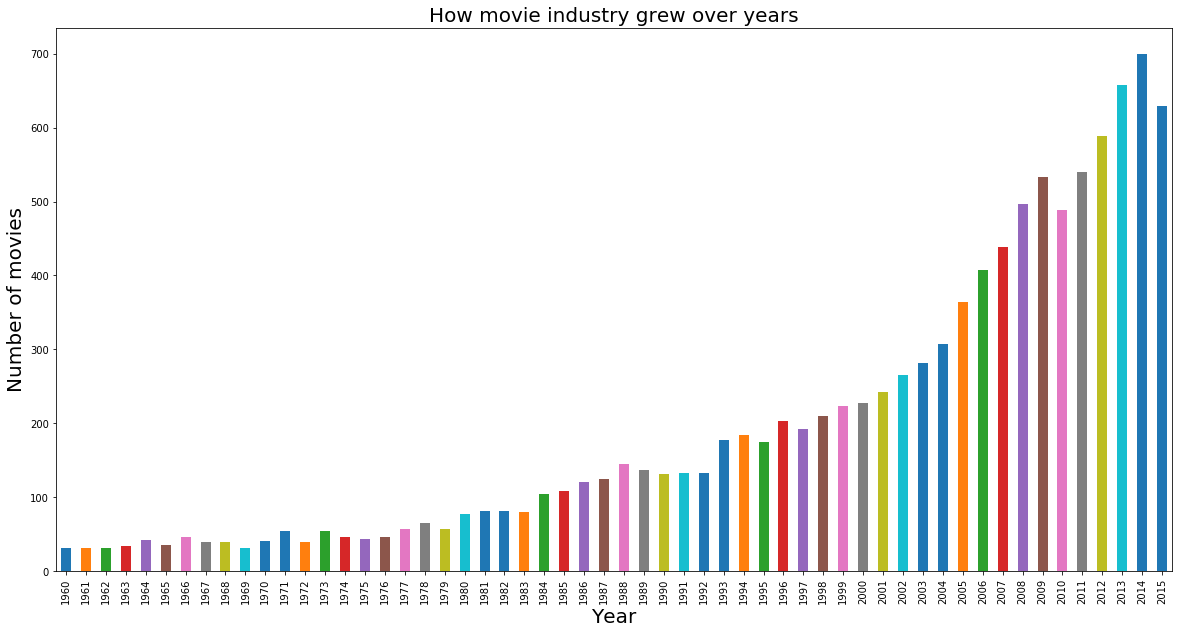

In [121]:
df.release_year.value_counts().sort_index().plot(kind='bar',figsize=(20,10));
plt.xlabel('Year',size=20)
plt.ylabel('Number of movies',size=20)
plt.title('How movie industry grew over years',size=20);

###### it seems that 2014 has the largest share of movies produced 

# Actors with the most appearances

In [122]:
df.actor.dropna().value_counts()[:10]

nan                      76
Nicolas Cage             50
Robert De Niro           42
Bruce Willis             39
Clint Eastwood           38
Sylvester Stallone       37
Johnny Depp              37
Tom Hanks                37
Steven Seagal            35
Jean-Claude Van Damme    35
Name: actor, dtype: int64

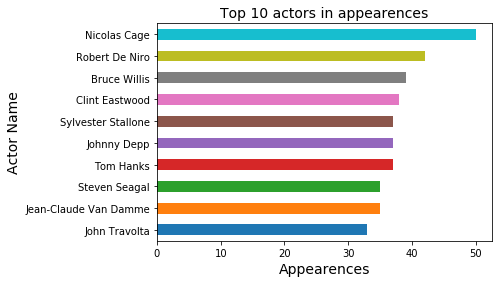

In [123]:
df.actor.value_counts(ascending=True).iloc[-11:-1].plot(kind='barh');
plt.ylabel('Actor Name',size=14)
plt.xlabel('Appearences',size=14);
plt.title('Top 10 actors in appearences',size=14);

# Top 10 movies in revenue

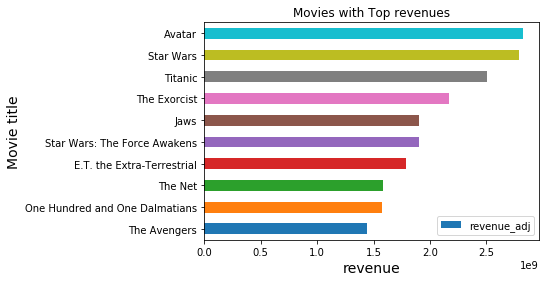

In [124]:
df.sort_values(['revenue_adj'],ascending=True)[-10:].plot(kind='barh',x='original_title',y='revenue_adj',title='Movies with Top revenues');
plt.ylabel('Movie title',size=14)
plt.xlabel('revenue',size=14);

# Top 10 movies in popularity

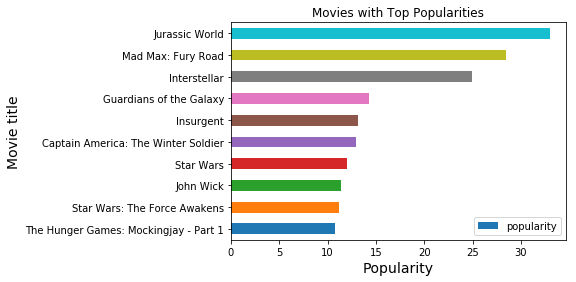

In [125]:
df.sort_values(['popularity'],ascending=True)[-10:].plot(kind='barh',x='original_title',y='popularity',title='Movies with Top Popularities');
plt.ylabel('Movie title',size=14)
plt.xlabel('Popularity',size=14);

# Most popular genre for each year

Now let us drop the missing values 

In [126]:
df.dropna(inplace=True)

##### first we create a list with unique years

In [127]:
years_list=list(df.release_year.unique())
years_list.sort()

In [128]:
df['genres']=df['genres'].apply(lambda x:x.split('|'));

In [129]:
def most_popular_in_year(year):
    genres_per_year=dict()
    df_year=df[df.release_year==year]       # a dataframe with rows of same release year
    for genre_list in df_year['genres']:
        for genre in genre_list:
            genres_per_year[genre]=genres_per_year.get(genre,0)+1        
    return max(genres_per_year,key=genres_per_year.get)

In [130]:
while True:
    print("To View the most popular genre in a year enter Yes")
    print('To exit enter No ')
    x=input('your choice:')
    if x.lower()=="yes":
        year=input('Enter a year: ')
        try:
            print('\nthe most populer genre in {} is {} '.format(year,most_popular_in_year(int(year))),'\n')
        except:
            print('please enter a year between 1960 and 2015')
    else:
        break
        

To View the most popular genre in a year enter Yes
To exit enter No 
your choice:


# How different features are correlated with revenue

First we need to clean rows with zeros in revenue_adj ,budget_adj and runtime columns as they would affect our analysis

In [131]:
df_clean=df[df['revenue_adj']!=0]
df_clean=df_clean[df_clean['budget_adj']!=0]
df_clean=df_clean[df_clean['runtime']!=0]
df_clean.shape

(3853, 10)

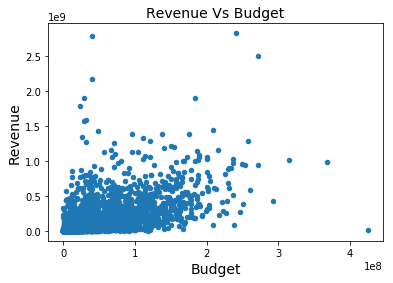

In [132]:
df_clean.plot(kind='scatter',x='budget_adj',y='revenue_adj');
plt.xlabel('Budget',size=14)
plt.ylabel('Revenue',size=14)
plt.title('Revenue Vs Budget',size=14);

High budget movies do not necesserly have higher revenues and vice versa.

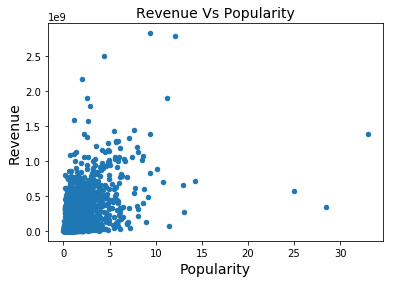

In [133]:
df_clean.plot(kind='scatter',x='popularity',y='revenue_adj');
plt.xlabel('Popularity',size=14)
plt.ylabel('Revenue',size=14)
plt.title('Revenue Vs Popularity',size=14);

the movie maybe popular but do not achieve high revenues. this maybe occur due to movies piracy.

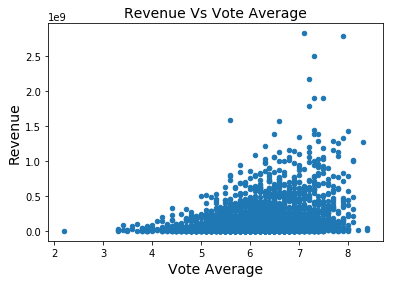

In [134]:
df_clean.plot(kind='scatter',x='vote_average',y='revenue_adj');
plt.xlabel('Vote Average',size=14)
plt.ylabel('Revenue',size=14)
plt.title('Revenue Vs Vote Average',size=14);

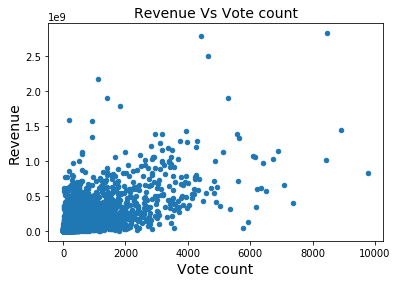

In [135]:
df_clean.plot(kind='scatter',x='vote_count',y='revenue_adj');
plt.xlabel('Vote count',size=14)
plt.ylabel('Revenue',size=14)
plt.title('Revenue Vs Vote count',size=14);

In [136]:
print(df_clean.corr())

              popularity   runtime  vote_count  vote_average  release_year  \
popularity      1.000000  0.215538    0.780091      0.317869      0.173254   
runtime         0.215538  1.000000    0.274093      0.351929     -0.112408   
vote_count      0.780091  0.274093    1.000000      0.387209      0.207177   
vote_average    0.317869  0.351929    0.387209      1.000000     -0.134251   
release_year    0.173254 -0.112408    0.207177     -0.134251      1.000000   
budget_adj      0.399537  0.333779    0.498088      0.036823      0.075149   
revenue_adj     0.546954  0.280760    0.654682      0.266841     -0.103160   

              budget_adj  revenue_adj  
popularity      0.399537     0.546954  
runtime         0.333779     0.280760  
vote_count      0.498088     0.654682  
vote_average    0.036823     0.266841  
release_year    0.075149    -0.103160  
budget_adj      1.000000     0.570544  
revenue_adj     0.570544     1.000000  


we notice that there is a week posistive correlation between:<br><li>revenue and popularity<br><li>revenue and budget<br><li>
revenue and vote average<br>and strong positive correlation between:<br><li>revenue and vote count

### <br>Now let us give a look at how the movie industry revenues changed over years

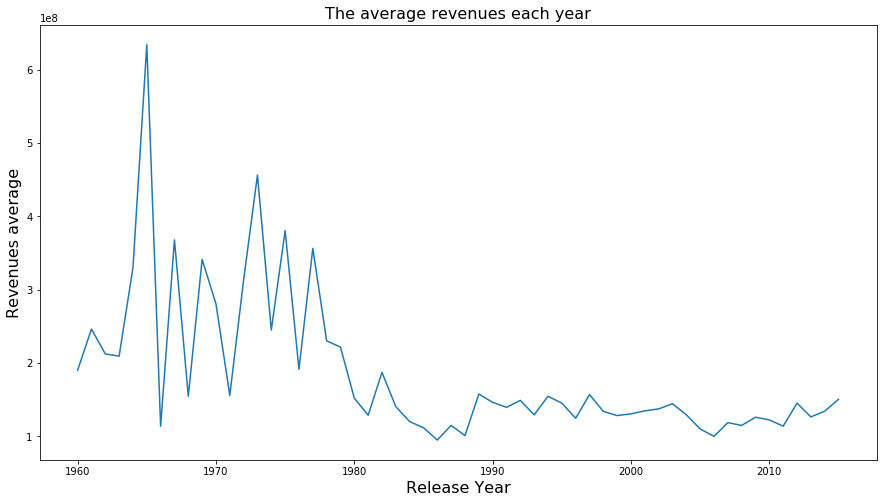

In [137]:
plt.figure(figsize=(15,8))
df_clean.groupby(['release_year'])['revenue_adj'].mean().plot();
plt.xlabel('Release Year',size=16)
plt.ylabel('Revenues average',size=16)
plt.title('The average revenues each year',size=16);

# Genres that achieves the highest revenues

We will check the common genres in top 100 movies that achieved the highest revenues

In [138]:
top_100_movies=df.sort_values(['revenue_adj'],ascending=False)[:100]

In [139]:
#top_1000_movies.genres=top_1000_movies.genres.apply(lambda x: x.split('|'))

In [140]:
top_100_genres=dict()
for genre_list in top_100_movies['genres']:
        for genre in genre_list:
            top_100_genres[genre]=top_100_genres.get(genre,0)+1        
top_100_genres

{'Action': 51,
 'Adventure': 72,
 'Fantasy': 35,
 'Science Fiction': 29,
 'Drama': 18,
 'Romance': 9,
 'Thriller': 22,
 'Horror': 2,
 'Family': 31,
 'Crime': 8,
 'Mystery': 6,
 'Animation': 17,
 'Comedy': 18,
 'Music': 2,
 'War': 1}

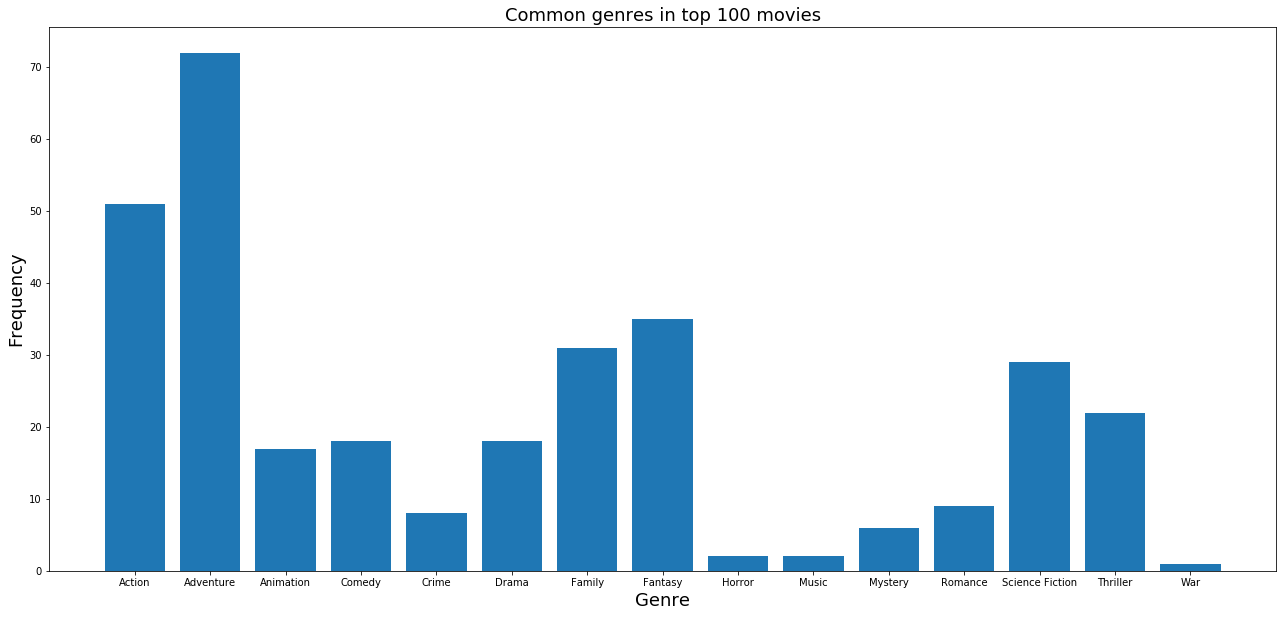

In [141]:
plt.figure(figsize=(22,10))
plt.bar(top_100_genres.keys(),top_100_genres.values());
plt.xlabel('Genre',size=18)
plt.ylabel('Frequency',size=18)
plt.title('Common genres in top 100 movies',size=18);

 Action adevenure movies seems to be the people favourite genres 

<a id='conclusions'></a>
## Conclusions

> Movie industry has grown hugely over years and the year with the greatest contribution is 2014.



>we notice that there is a week posistive correlation between:<br><li>revenue and popularity<br><li>revenue and budget<br><li>
revenue and vote average<br>and strong positive correlation between:<br><li>revenue and vote count <br>
>**Note**:>  No statistical tests was performed so our findings may be incorrect.<br><br>
> Action adevenure movies seems to have the highest revenues.
  ><br><br>The average revenues is in decrease over time.  <br>
><br> one limitation that faced us was the huge number of rows that have zeros in revenue_adj , budget_adj columns.<br>



In [142]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0